# Pooling-imputation performance from real bead chip data with high density markers

Performs imputation on data from the chromosome 20 of 1000GP on not pooled data.
The 1KGP data spans from POS 60,343 to POS 62,965,354 i.e. a size of ca. 63Mb.

The reference markers have been chosen as the intersection between the real bead chip Illumina Infinium OmniExpress2.5 - 8 Kit
 and the chr20 1000GP data. These are ca. 52,900 markers which corresponds to a density of approx. 1 SNP per 1,19 kb 
 (bibliography Beagle07 mentions 1 SNP per 1 kb for high-density coverage).
Target markers from the intersection between the real bead chip Illumina Infinium OmniExpress - 24 Kit
 and the chr20 1000GP data. These are ca. 17,791 markers which corresponds to a density of approx. 1 SNP per 3,35 kb 
 (bibliography Beagle07 mentions 1 SNP per 3 kb for low-density coverage).
 
The samples are assigned to the reference panel or the study population in the same layout as imputing pooled samples
  on high-density genotyped markers (see 20200709).

No pooling simulation on this data, and imputation (run parallel execution): 
**pool and impute bead chip markers only, compute metrics and plot statistics** 

In [1]:
import os

try:
    os.mkdir('/home/camille/PoolImpHuman/data/20200710')
except FileExistsError:
    pass
os.chdir('/home/camille/PoolImpHuman/data/20200710')

In [2]:
print('Configure directory')
%sx ln -s ~/1000Genomes/scripts/VCFPooling/python/omniexpress24chr20.ipynb ./
%sx ln -s ~/1000Genomes/scripts/VCFPooling/python/omniexpress_20200710.ipynb ./
%sx ln -s ../omniexpress24/InfiniumOmniExpress-chr20-CHROM-POS.txt ./

# Use same target population as with imputation from pooled data
%sx ln -s ../20200709/study.population

Configure directory


[]

In [3]:
# Use the high-density coverage as reference panel for imputation
%sx ln -s ../20200709/REF.chr20.snps.gt.vcf.gz 
%sx ln -s ../20200709/REF.chr20.snps.gt.vcf.gz.csi 

[]

### Prepare experimental VCF file (low-density coverage)

In [4]:
print('Create file')
%sx bcftools view -Oz -o ALL.chr20.snps.gt.vcf.gz -R InfiniumOmniExpress-chr20-CHROM-POS.txt ../main/ALL.chr20.snps.gt.vcf.gz

Create file


[]

In [5]:
print('Index file')
%sx bcftools index ALL.chr20.snps.gt.vcf.gz

Index file


[]

In [6]:
print('Check number of samples')
%sx bcftools query -l ALL.chr20.snps.gt.vcf.gz | wc -l

Check number of samples


['2504']

In [7]:
print('Check number of intersected markers')
%sx bcftools view -H ALL.chr20.snps.gt.vcf.gz | wc -l

Check number of intersected markers


['17791']

In [8]:
print('Create STU population (target)')
# IMP.chr20.pooled.snps.gl.vcf.gz not GL formatted but name should fit in the bash script for phasing + imputation
%sx bcftools view -Oz -S study.population -o IMP.chr20.pooled.snps.gl.vcf.gz ALL.chr20.snps.gt.vcf.gz
%sx bcftools index -f IMP.chr20.pooled.snps.gl.vcf.gz

Create STU population (target)


[]

In [9]:
%sx pwd
%sx ls -la

['total 17756',
 'drwxrwxr-x  2 camille camille     4096 jul 11 23:45 .',
 'drwxr-xr-x 24 camille camille     4096 jul 11 23:42 ..',
 '-rw-rw-r--  1 camille camille 15800340 jul 11 23:45 ALL.chr20.snps.gt.vcf.gz',
 '-rw-rw-r--  1 camille camille    32027 jul 11 23:45 ALL.chr20.snps.gt.vcf.gz.csi',
 '-rw-rw-r--  1 camille camille  2298580 jul 11 23:45 IMP.chr20.pooled.snps.gl.vcf.gz',
 '-rw-rw-r--  1 camille camille    26830 jul 11 23:45 IMP.chr20.pooled.snps.gl.vcf.gz.csi',
 'lrwxrwxrwx  1 camille camille       56 jul 11 23:42 InfiniumOmniExpress-chr20-CHROM-POS.txt -> ../omniexpress24/InfiniumOmniExpress-chr20-CHROM-POS.txt',
 'lrwxrwxrwx  1 camille camille       78 jul 11 23:42 omniexpress_20200710.ipynb -> /home/camille/1000Genomes/scripts/VCFPooling/python/omniexpress_20200710.ipynb',
 'lrwxrwxrwx  1 camille camille       76 jul 11 23:42 omniexpress24chr20.ipynb -> /home/camille/1000Genomes/scripts/VCFPooling/python/omniexpress24chr20.ipynb',
 'lrwxrwxrwx  1 camille camille       3

In [10]:
print('Impute missing genotypes in the low-density coverage file')
%sx rm beagle_pipeline.sh
%sx ln -s /home/camille/PoolImpHuman/bin/bash-scripts/beagle_pipeline.sh ./
%sx bash beagle_pipeline.sh

Impute missing genotypes in the low-density coverage file


['Contigs in the reference file',
 '.................................................................................',
 'Chromosome  20    Startpos = 61651    Endpos = 62947458',
 '',
 '',
 'Check FORMAT field in files for imputation',
 '.................................................................................',
 'FORMAT in reference panel:  GT',
 'FORMAT in target:  GT',
 '',
 '',
 'Check number of samples and number of markers in files for imputation',
 '.................................................................................',
 'reference:',
 '2264',
 '',
 'target:',
 '240',
 '',
 '',
 'Phase reference and target with BEAGLE',
 '.................................................................................',
 'Beagle .jar file used at: /home/camille/1000Genomes/scripts/beagle.11Mar19.69c.jar',
 '',
 'FORMAT in the phased ref file: GT',
 'beagle.11Mar19.69c.jar (version 4.1)',
 'Copyright (C) 2014-2015 Brian L. Browning',
 'Enter "java -jar beagle.11Mar19.69c.jar

In [11]:
print('Plotting results with bcftools stats')
%sx deactivate
# bcftools stats needs python 2.7
%sx bcftools stats --af-bins 0.01,0.02,0.04,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.98 --collapse snps -S study.population IMP.chr20.pooled.imputed.vcf.gz IMP.chr20.snps.gt.vcf.gz > filestats.vchk
%sx plot-vcfstats -p bcftoolstats -s filestats.vchk

Plotting results with bcftools stats


['Parsing bcftools stats output: filestats.vchk',
 'Sanity check failed: was this file generated by bcftools stats? at /usr/bin/plot-vcfstats line 99.',
 '\tmain::error("Sanity check failed: was this file generated by bcftools stats?") called at /usr/bin/plot-vcfstats line 585',
 '\tmain::parse_vcfstats1(HASH(0x56115786db78), 0) called at /usr/bin/plot-vcfstats line 294',
 '\tmain::parse_vcfstats(HASH(0x56115786db78)) called at /usr/bin/plot-vcfstats line 47']

### Compute results with customized metrics

In [39]:
# Intersect files for imputed markers only
# List of markers sites imputed in ./isec/sites.txt
%sx bcftools isec -C -p isec REF.chr20.snps.gt.vcf.gz IMP.chr20.pooled.snps.gl.vcf.gz 

[]

In [41]:
%sx bcftools view -Oz -o plt.chr20.snps.gt.vcf.gz -R ./isec/sites.txt ../20200709/IMP.chr20.snps.gt.vcf.gz
%sx bcftools view -Oz -o plt.chr20.snps.imputed.vcf.gz -R ./isec/sites.txt IMP.chr20.pooled.imputed.vcf.gz
%sx bcftools index -f plt.chr20.snps.gt.vcf.gz
%sx bcftools index -f plt.chr20.snps.imputed.vcf.gz

[]

In [47]:
paths = {'beaglegt': {
    'true': '/home/camille/PoolImpHuman/data/20200710/plt.chr20.snps.gt.vcf.gz',  # 52,900 true markers genotypes
    'imputed': '/home/camille/PoolImpHuman/data/20200710/plt.chr20.snps.imputed.vcf.gz'},
         'beaglegl': {
     'true': '/home/camille/PoolImpHuman/data/20200710/plt.chr20.snps.gl.vcf.gz',
     'imputed': '/home/camille/PoolImpHuman/data/20200710/plt.chr20.snps.imputed.vcf.gz'},
}

In [50]:
import subprocess

convertgtgl = True
if convertgtgl:
    cmd = 'bash ~/PoolImpHuman/bin/bash-scripts/gt_to_gl.sh {} {}'.format(paths['beaglegt']['true'], paths['beaglegl']['true'])
    subprocess.run(cmd, shell=True,)

In [25]:
import pandas as pd
from scripts.VCFPooling.poolSNPs.metrics import quality

In [51]:
qbeaglegt = quality.QualityGT(*paths['beaglegt'].values(), 0, idx='id')

In [52]:
qbeaglegl = quality.QualityGL(paths['beaglegl']['true'], paths['beaglegl']['imputed'], 0, idx='id')
messbeagle = qbeaglegl.cross_entropy

In [53]:
#qbeaglegl = quality.QualityGT(*paths['beaglegt'].values(), 0, idx='id')
tabbeaglegl = pd.concat([qbeaglegt.concordance(),
                       qbeaglegt.trueobj.af_info,
                       qbeaglegt.pearsoncorrelation(),
                       qbeaglegt.precision,
                       qbeaglegt.accuracy,
                       qbeaglegt.recall,
                       qbeaglegt.f1_score,
                        qbeaglegl.cross_entropy], axis=1)
dosbeaglegl = qbeaglegt.alleledosage()
tabbeaglegl.shape


(35682, 8)

In [54]:
tabbeaglegl.head()

,concordance,af_info,r_squared,precision_score,accuracy_score,recall_score,f1_score,cross_entropy
variants,,,,,,,,
rs76553454,0.995833,0.005791,0.497908,0.995851,0.995833,0.995833,0.995143,0.020070
rs6076506,0.854167,0.130990,0.377520,0.851116,0.858333,0.858333,0.851069,0.353994
rs17685809,0.966667,0.045327,0.523057,0.964543,0.966667,0.966667,0.964593,0.098029
rs114000219,0.991667,0.006789,0.761451,0.991667,0.991667,0.991667,0.991667,0.023641
rs34383360,0.925000,0.325280,0.833473,0.925345,0.925000,0.925000,0.924885,0.211115


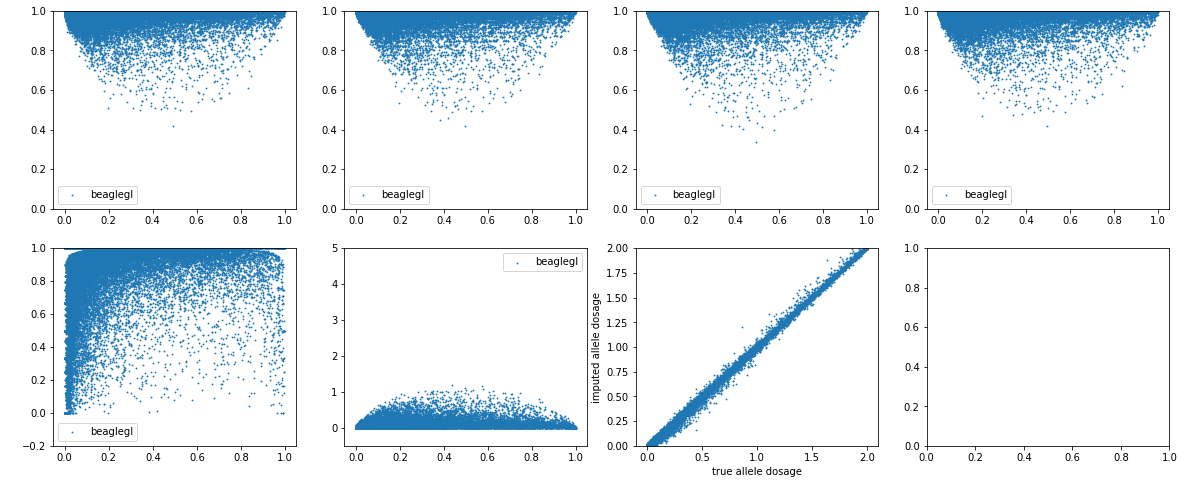

In [55]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [5*4, 4*2]
fig, axes = plt.subplots(2, 4)

tabbeaglegl.plot.scatter('af_info', 'precision_score', ax=axes[0, 0], s=0.7, label='beaglegl')
axes[0, 0].set_ylim(0.0, 1.0)
tabbeaglegl.plot.scatter('af_info', 'accuracy_score', ax=axes[0, 1], s=0.7, label='beaglegl')
axes[0, 1].set_ylim(0.0, 1.0)
tabbeaglegl.plot.scatter('af_info', 'concordance', ax=axes[0, 2], s=0.7, label='beaglegl')
axes[0, 2].set_ylim(0.0, 1.0)
tabbeaglegl.plot.scatter('af_info', 'f1_score', ax=axes[0, 3], s=0.7, label='beaglegl')
axes[0, 3].set_ylim(0.0, 1.0)
tabbeaglegl.plot.scatter('af_info', 'r_squared', ax=axes[1, 0], s=0.7, label='beaglegl')
axes[1, 0].set_ylim(-0.2, 1.0)
tabbeaglegl.plot.scatter('af_info', 'cross_entropy', ax=axes[1, 1], s=0.7, label='beaglegl')
axes[1, 1].set_ylim(-0.5, 5.0)
axes[1, 2].scatter(dosbeaglegl[0], dosbeaglegl[1], s=0.7, label='beaglegl')
axes[1, 2].set_xlabel('true allele dosage')
axes[1, 2].set_ylabel('imputed allele dosage')
axes[1, 2].set_ylim(0.0, 2.0)

for ax in axes.flatten()[:-2]:
    # cast color to white 'w' if dark background
    ax.set_xlabel('true alternate allele frequency', color='w')
    ax.set_ylabel(ax.get_ylabel(), color='w')
plt.savefig(os.path.join(os.path.dirname(paths['beaglegt']['imputed']), 'imputation_quality_gtgl.png'))
plt.show()